In [2]:
#1 Import dataset and display first 5 rows
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Load the dataset
df = pd.read_csv("tvmarketing.csv")

# Display first 5 rows
print(df.head())


      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [3]:
#2 Check column data types
print(df.dtypes)  


TV       float64
Sales    float64
dtype: object


In [4]:
#3 Check the shape of the DataFrame (rows, columns)
print(df.shape)  


(200, 2)


In [5]:
#4 Look at summary statistics
print(df.describe())

               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


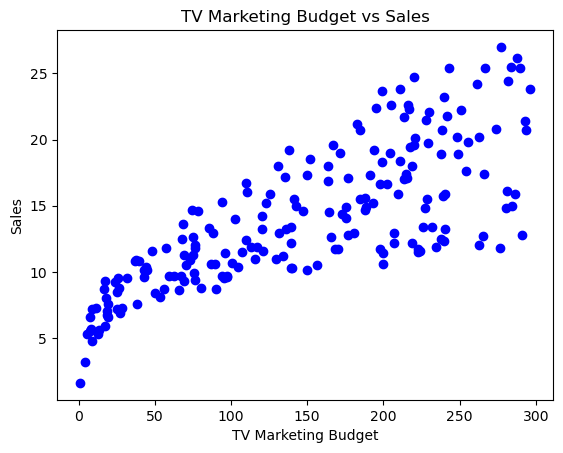

In [6]:
#5 Visualize the relationship between 'TV' and 'Sales' using a scatterplot
import matplotlib.pyplot as plt  

plt.scatter(df["TV"], df["Sales"], color="blue")  
plt.xlabel("TV Marketing Budget")  
plt.ylabel("Sales")  
plt.title("TV Marketing Budget vs Sales")  
plt.show()  


In [8]:
#6 Prepare X (feature variable) and y (response variable)
X = df["TV"].values.reshape(-1, 1)  
y = df["Sales"].values  
print("Feature variable (X):")
print(X[:5])  # Displaying first 5 values of X

print("\nResponse variable (y):")
print(y[:5]) 


Feature variable (X):
[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]]

Response variable (y):
[22.1 10.4  9.3 18.5 12.9]


In [11]:
#7 Split Data into Training and Testing Sets (70%-Train, 30%-Test)
from sklearn.model_selection import train_test_split  

# Splitting data into 70% training and 30% testing  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

# Printing the first 5 values from each set  
print("X_train (first 5 values):\n", X_train[:5])  
print("\nX_test (first 5 values):\n", X_test[:5])  
print("\ny_train (first 5 values):\n", y_train[:5])  
print("\ny_test (first 5 values):\n", y_test[:5])  


X_train (first 5 values):
 [[284.3]
 [184.9]
 [112.9]
 [ 23.8]
 [290.7]]

X_test (first 5 values):
 [[163.3]
 [195.4]
 [292.9]
 [ 11.7]
 [220.3]]

y_train (first 5 values):
 [15.  15.5 11.9  9.2 12.8]

y_test (first 5 values):
 [16.9 22.4 21.4  7.3 24.7]


In [12]:
#8 Print the shape of train data and test data
print("Train Data Shape:", X_train.shape, y_train.shape)  
print("Test Data Shape:", X_test.shape, y_test.shape)  


Train Data Shape: (140, 1) (140,)
Test Data Shape: (60, 1) (60,)


In [13]:
#9 Perform Linear Regression (on train data) without using any library
import numpy as np  

# Calculate coefficients manually  
n = len(X_train)  
X_mean = np.mean(X_train)  
y_mean = np.mean(y_train)  

numerator = sum((X_train - X_mean) * (y_train - y_mean))  
denominator = sum((X_train - X_mean) ** 2)  

b1 = numerator / denominator  # Slope  
b0 = y_mean - (b1 * X_mean)  # Intercept  

print(f"Intercept (b0): {b0}")  
print(f"Slope (b1): {b1}")  


Intercept (b0): [14.49714286 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286
 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286
 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286
 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286
 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286
 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286
 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286
 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286
 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286
 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286
 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286
 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286
 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286 14.49714286
 14.49714286 14.49714286 14.4971428

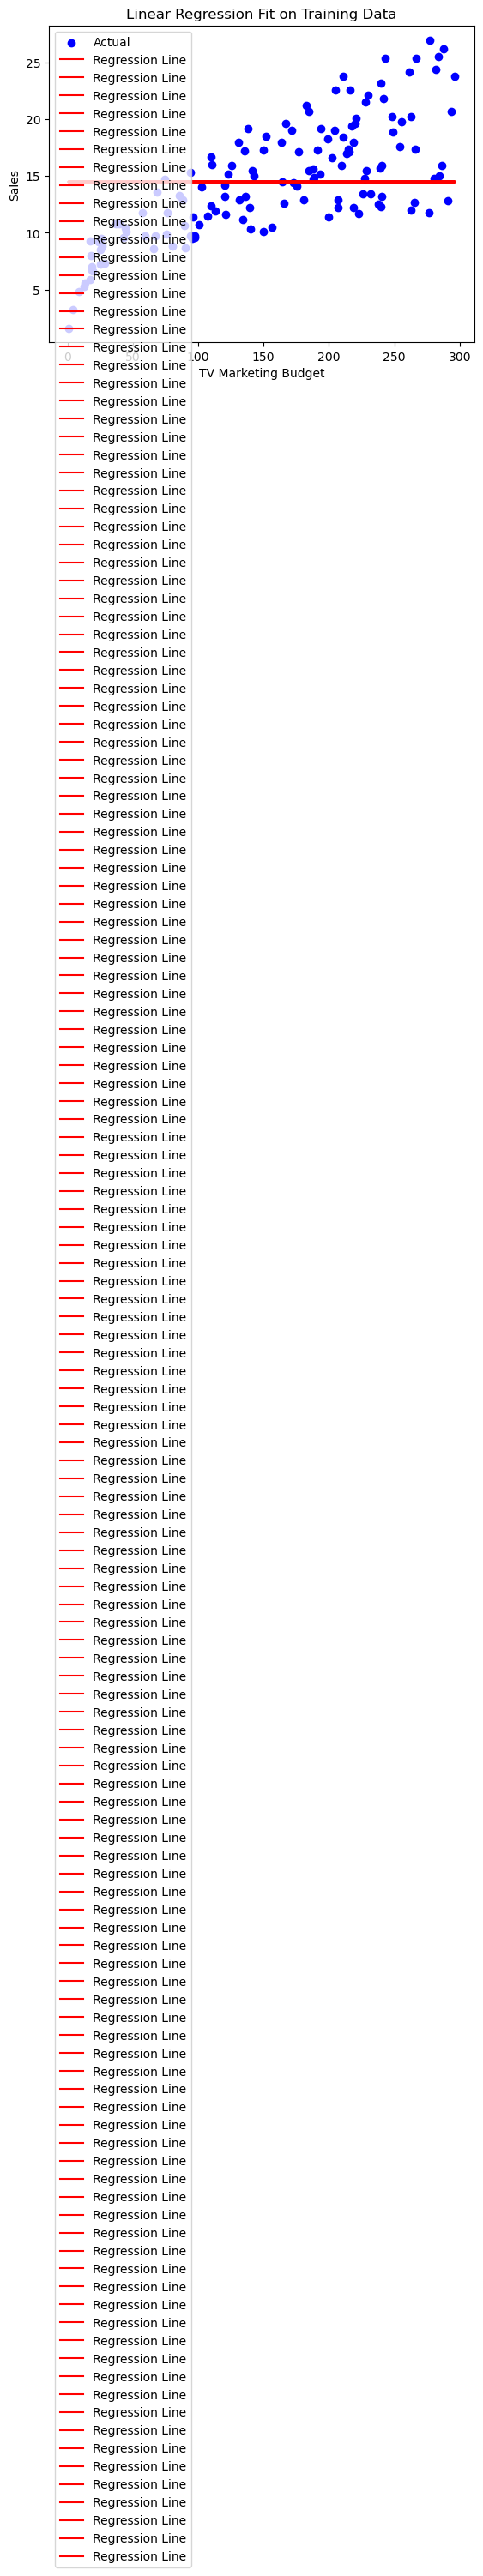

In [14]:
#10 Create the model using the calculated coefficients
# Predict Sales using the model  
y_pred_train = b0 + (b1 * X_train)  
y_pred_test = b0 + (b1 * X_test)  

# Plot regression line  
plt.scatter(X_train, y_train, color="blue", label="Actual")  
plt.plot(X_train, y_pred_train, color="red", label="Regression Line")  
plt.xlabel("TV Marketing Budget")  
plt.ylabel("Sales")  
plt.title("Linear Regression Fit on Training Data")  
plt.legend()  
plt.show()  


In [15]:
#11 Perform Linear Regression using library (sklearn)
from sklearn.linear_model import LinearRegression  

# Create Linear Regression model  
model = LinearRegression()  

# Train the model using the training data  
model.fit(X_train, y_train)  



LinearRegression()

In [16]:
#12 Print the intercept and coefficients
# Print intercept and coefficient  
print("Intercept (b0):", model.intercept_)  
print("Coefficient (b1):", model.coef_[0])  


Intercept (b0): 7.23945983075114
Coefficient (b1): 0.04640780212815275


In [17]:
#13 Make predictions on the testing set - y_pred
# Make predictions  
y_pred = model.predict(X_test)  

# Display first 5 predicted values  
print("First 5 Predicted Sales:", y_pred[:5])  


First 5 Predicted Sales: [14.81785392 16.30754437 20.83230507  7.78243112 17.46309864]


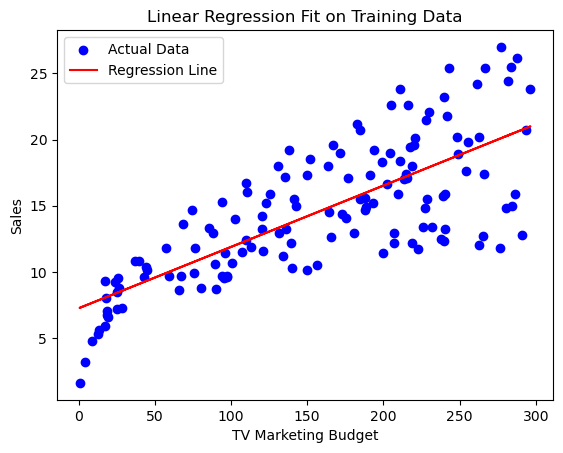

In [18]:
#14 Plot train data and the model
import matplotlib.pyplot as plt  

# Plot training data  
plt.scatter(X_train, y_train, color="blue", label="Actual Data")  
plt.plot(X_train, model.predict(X_train), color="red", label="Regression Line")  
plt.xlabel("TV Marketing Budget")  
plt.ylabel("Sales")  
plt.title("Linear Regression Fit on Training Data")  
plt.legend()  
plt.show()  


In [19]:
#16 Print Mean Squared Error (MSE) and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score  

# Calculate Mean Squared Error (MSE)  
mse = mean_squared_error(y_test, y_pred)  

# Calculate R-squared value  
r2 = r2_score(y_test, y_pred)  

print("Mean Squared Error:", mse)  
print("R Squared Value:", r2)  


Mean Squared Error: 8.970991242413616
R Squared Value: 0.6714477229302764


In [20]:
#17 Calculate and print R Squared and Adjusted R Squared values without using any library
# Manually calculate R Squared  
ss_total = sum((y_test - np.mean(y_test))**2)  
ss_residual = sum((y_test - y_pred)**2)  

r2_manual = 1 - (ss_residual / ss_total)  

n = len(y_test)  
p = 1 

adj_r2 = 1 - ((1 - r2_manual) * (n - 1) / (n - p - 1))  

print("Manually Calculated R Squared:", r2_manual)  
print("Adjusted R Squared:", adj_r2)  


Manually Calculated R Squared: 0.6714477229302764
Adjusted R Squared: 0.6657830284980398
